Importing dataset

In [3]:
import pandas as pd
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140703 entries, 0 to 140702
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    140703 non-null  int64  
 1   V1      140703 non-null  float64
 2   V2      140703 non-null  float64
 3   V3      140703 non-null  float64
 4   V4      140703 non-null  float64
 5   V5      140702 non-null  float64
 6   V6      140702 non-null  float64
 7   V7      140702 non-null  float64
 8   V8      140702 non-null  float64
 9   V9      140702 non-null  float64
 10  V10     140702 non-null  float64
 11  V11     140702 non-null  float64
 12  V12     140702 non-null  float64
 13  V13     140702 non-null  float64
 14  V14     140702 non-null  float64
 15  V15     140702 non-null  float64
 16  V16     140702 non-null  float64
 17  V17     140702 non-null  float64
 18  V18     140702 non-null  float64
 19  V19     140702 non-null  float64
 20  V20     140702 non-null  float64
 21  V21     14

Import required modules

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

Data Exploration

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
df['Class'].value_counts()


Class
0.0    81100
1.0      198
Name: count, dtype: int64

In [8]:
true = df[df.Class == 0]
false = df[df.Class == 1]

In [9]:
# statistical measures of the data
true.Amount.describe()

count    81100.000000
mean        98.107837
std        269.738371
min          0.000000
25%          7.730000
50%         26.990000
75%         89.530000
max      19656.530000
Name: Amount, dtype: float64

In [10]:
false.Amount.describe()

count     198.000000
mean       93.992778
std       211.099415
min         0.000000
25%         1.000000
50%         6.410000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37682.000937,-0.244848,-0.049587,0.701227,0.150821,-0.266673,0.100652,-0.097695,0.045923,-0.005120,...,0.041506,-0.031324,-0.104952,-0.037601,0.008468,0.134375,0.025923,0.000776,0.002077,98.107837
1.0,33363.156566,-6.471142,4.615004,-8.642655,5.163640,-4.726320,-1.982527,-6.839513,3.005157,-3.106588,...,0.381224,0.754921,-0.156429,-0.222226,-0.092181,0.229928,0.089311,0.568505,0.053900,93.992778


In [14]:
legit_sample = true.sample(n=492)
new_dataset = pd.concat([legit_sample, false], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36775,38679,-0.710068,1.235347,2.391864,1.591896,0.683385,0.308572,1.334794,-0.224423,-1.432687,...,-0.443277,-1.205576,-0.040084,0.102200,-0.179391,-0.521364,-0.426799,-0.389977,28.50,0.0
55751,47108,-2.445217,-0.660399,1.923639,3.111751,2.837447,-1.593133,-0.004310,0.177843,-2.449844,...,0.305755,-0.058027,0.135764,0.490569,0.758449,-0.042045,-0.121493,0.094546,49.73,0.0
46946,43001,-0.288238,0.987027,0.737061,-0.359743,0.653211,0.089180,0.529096,0.207134,-0.434650,...,-0.309646,-0.892256,-0.181294,-1.079859,-0.041428,0.140035,0.234423,0.072689,3.98,0.0
12188,21266,-0.449125,1.020192,1.065292,0.410660,-0.415363,-0.551762,0.193511,0.347198,0.664371,...,-0.127208,-0.223376,0.133761,0.491395,-0.401138,0.083963,-0.138648,-0.040727,32.13,0.0
56437,47426,0.800442,-1.252205,1.094588,0.623545,-1.865902,-0.370191,-0.686096,0.163629,1.785389,...,0.063924,0.022568,-0.180673,0.779669,0.172669,1.164444,-0.075599,0.041924,202.00,0.0


In [15]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0    198
Name: count, dtype: int64

In [31]:
X = new_dataset.drop(columns='Class', axis=1)
y= new_dataset['Class']

Building different models using SMOTE, ADASYN, and SMOTEENN resampling techniques

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def resample_data(X, y, method):
    if method == 'SMOTE':
        resampler = SMOTE(random_state=42)
    elif method == 'ADASYN':
        resampler = ADASYN(random_state=42)
    elif method == 'SMOTEENN':
        resampler = SMOTEENN(random_state=42)
    else:
        raise ValueError("Unsupported resampling method")
    return resampler.fit_resample(X, y)

resampling_methods = ['SMOTE', 'ADASYN', 'SMOTEENN']
best_results = []

for method in resampling_methods:
    X_resampled, y_resampled = resample_data(X_scaled, y, method)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    # Initialize classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }

    # SVM with Grid Search for hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }

    grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)

    # Evaluate classifiers
    results = []

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            'Algorithm': name,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'Confusion Matrix': cm
        })

    # Adding SVM with the best parameters found by GridSearch
    svm_best = grid.best_estimator_
    y_pred = svm_best.predict(X_test)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Algorithm': f'SVM (GridSearch) - {method}',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': cm
    })

    best_results.extend(results)

# Convert results to DataFrame
results_df = pd.DataFrame(best_results, columns=['Algorithm', 'Precision', 'Recall', 'F1-score', 'Confusion Matrix'])

# Display table
print(results_df)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

Evaulation of models based on precision, recall,  F1 score and confusion matrix

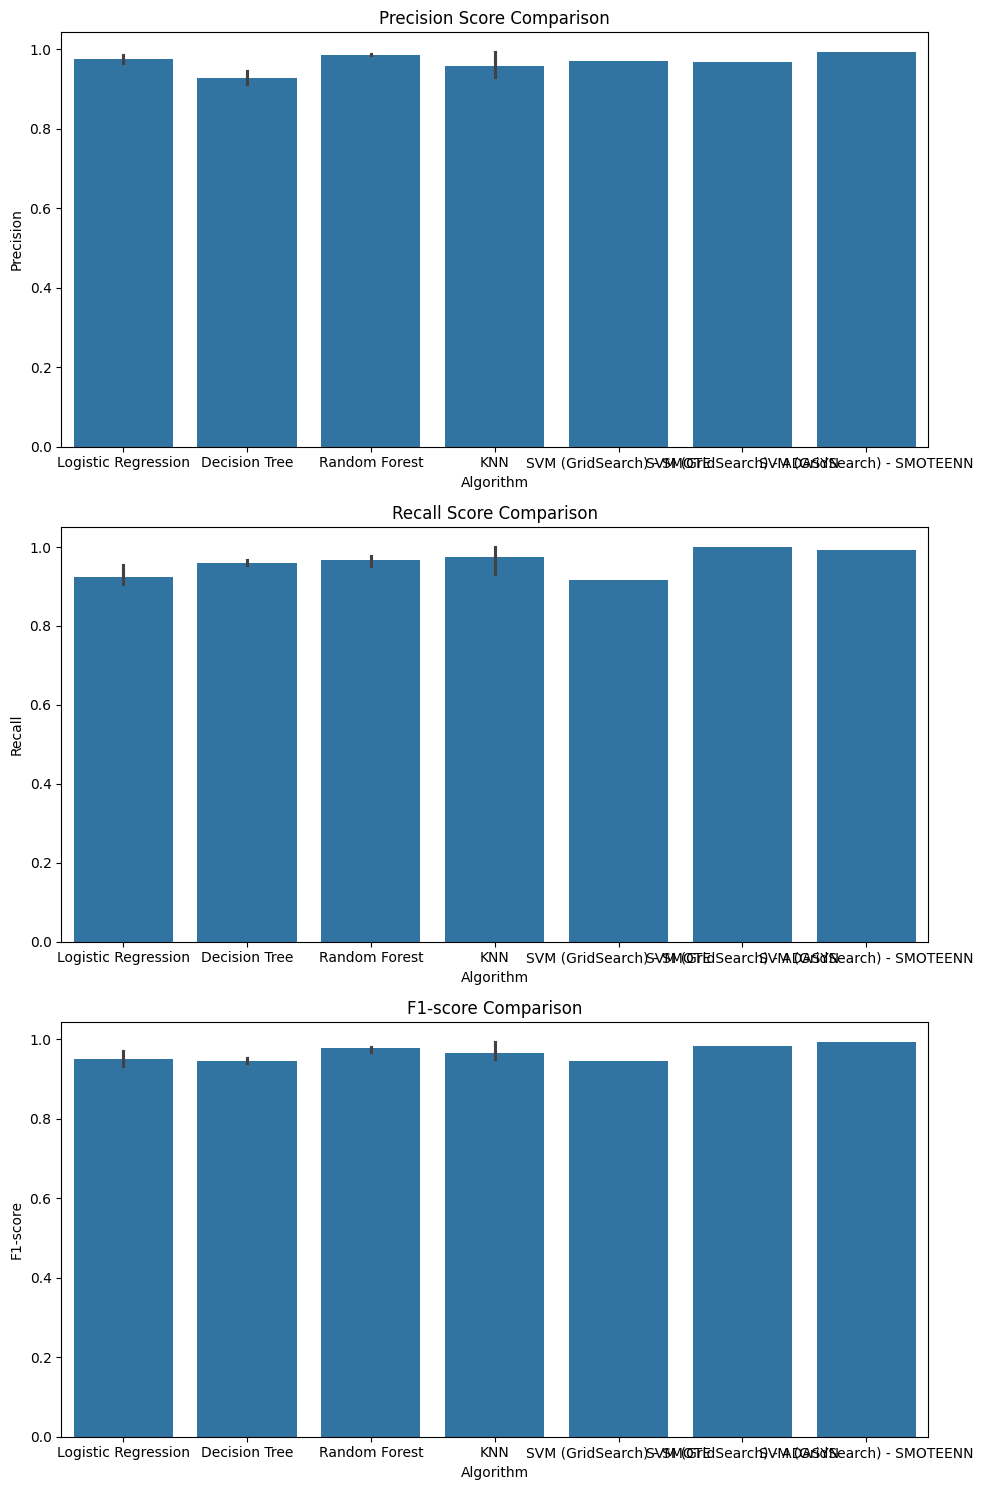

In [83]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting Precision
sns.barplot(x='Algorithm', y='Precision', data=results_df, ax=axes[0])
axes[0].set_title('Precision Score Comparison')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Precision')

# Plotting Recall
sns.barplot(x='Algorithm', y='Recall', data=results_df, ax=axes[1])
axes[1].set_title('Recall Score Comparison')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Recall')

# Plotting F1-score
sns.barplot(x='Algorithm', y='F1-score', data=results_df, ax=axes[2])
axes[2].set_title('F1-score Comparison')
axes[2].set_xlabel('Algorithm')
axes[2].set_ylabel('F1-score')

plt.tight_layout()
plt.show()


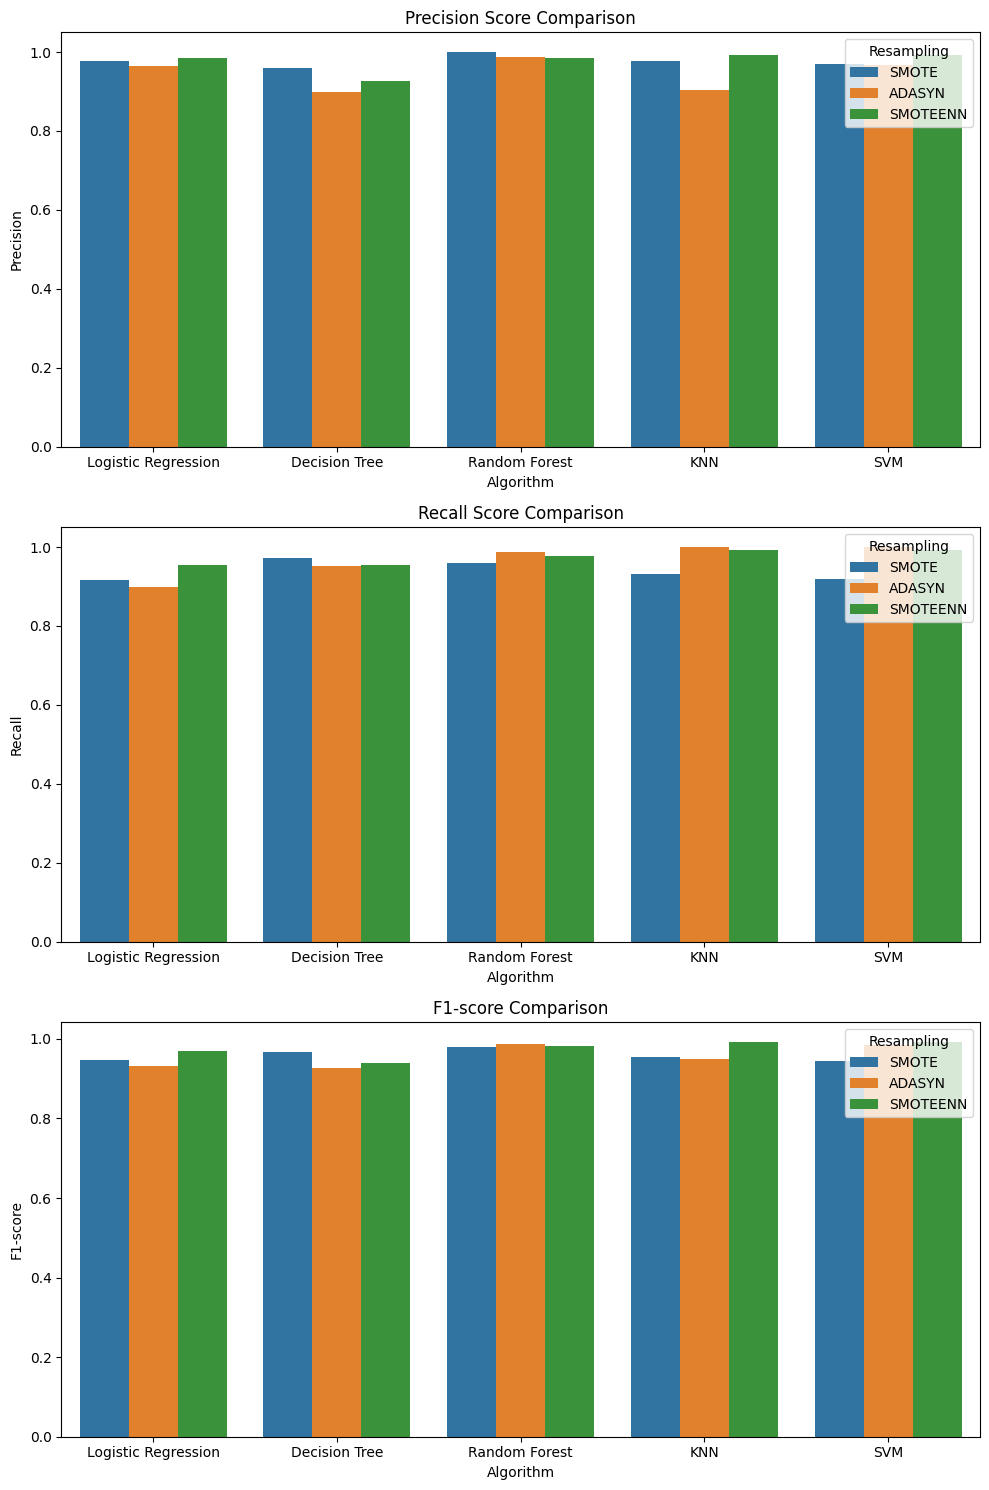

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame
results_df = pd.DataFrame(results)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting Precision
sns.barplot(x='Algorithm', y='Precision', hue='Resampling', data=results_df, ax=axes[0])
axes[0].set_title('Precision Score Comparison')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Precision')
axes[0].legend(title='Resampling', loc='upper right')

# Plotting Recall
sns.barplot(x='Algorithm', y='Recall', hue='Resampling', data=results_df, ax=axes[1])
axes[1].set_title('Recall Score Comparison')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Recall')
axes[1].legend(title='Resampling', loc='upper right')

# Plotting F1-score
sns.barplot(x='Algorithm', y='F1-score', hue='Resampling', data=results_df, ax=axes[2])
axes[2].set_title('F1-score Comparison')
axes[2].set_xlabel('Algorithm')
axes[2].set_ylabel('F1-score')
axes[2].legend(title='Resampling', loc='upper right')

plt.tight_layout()
plt.show()


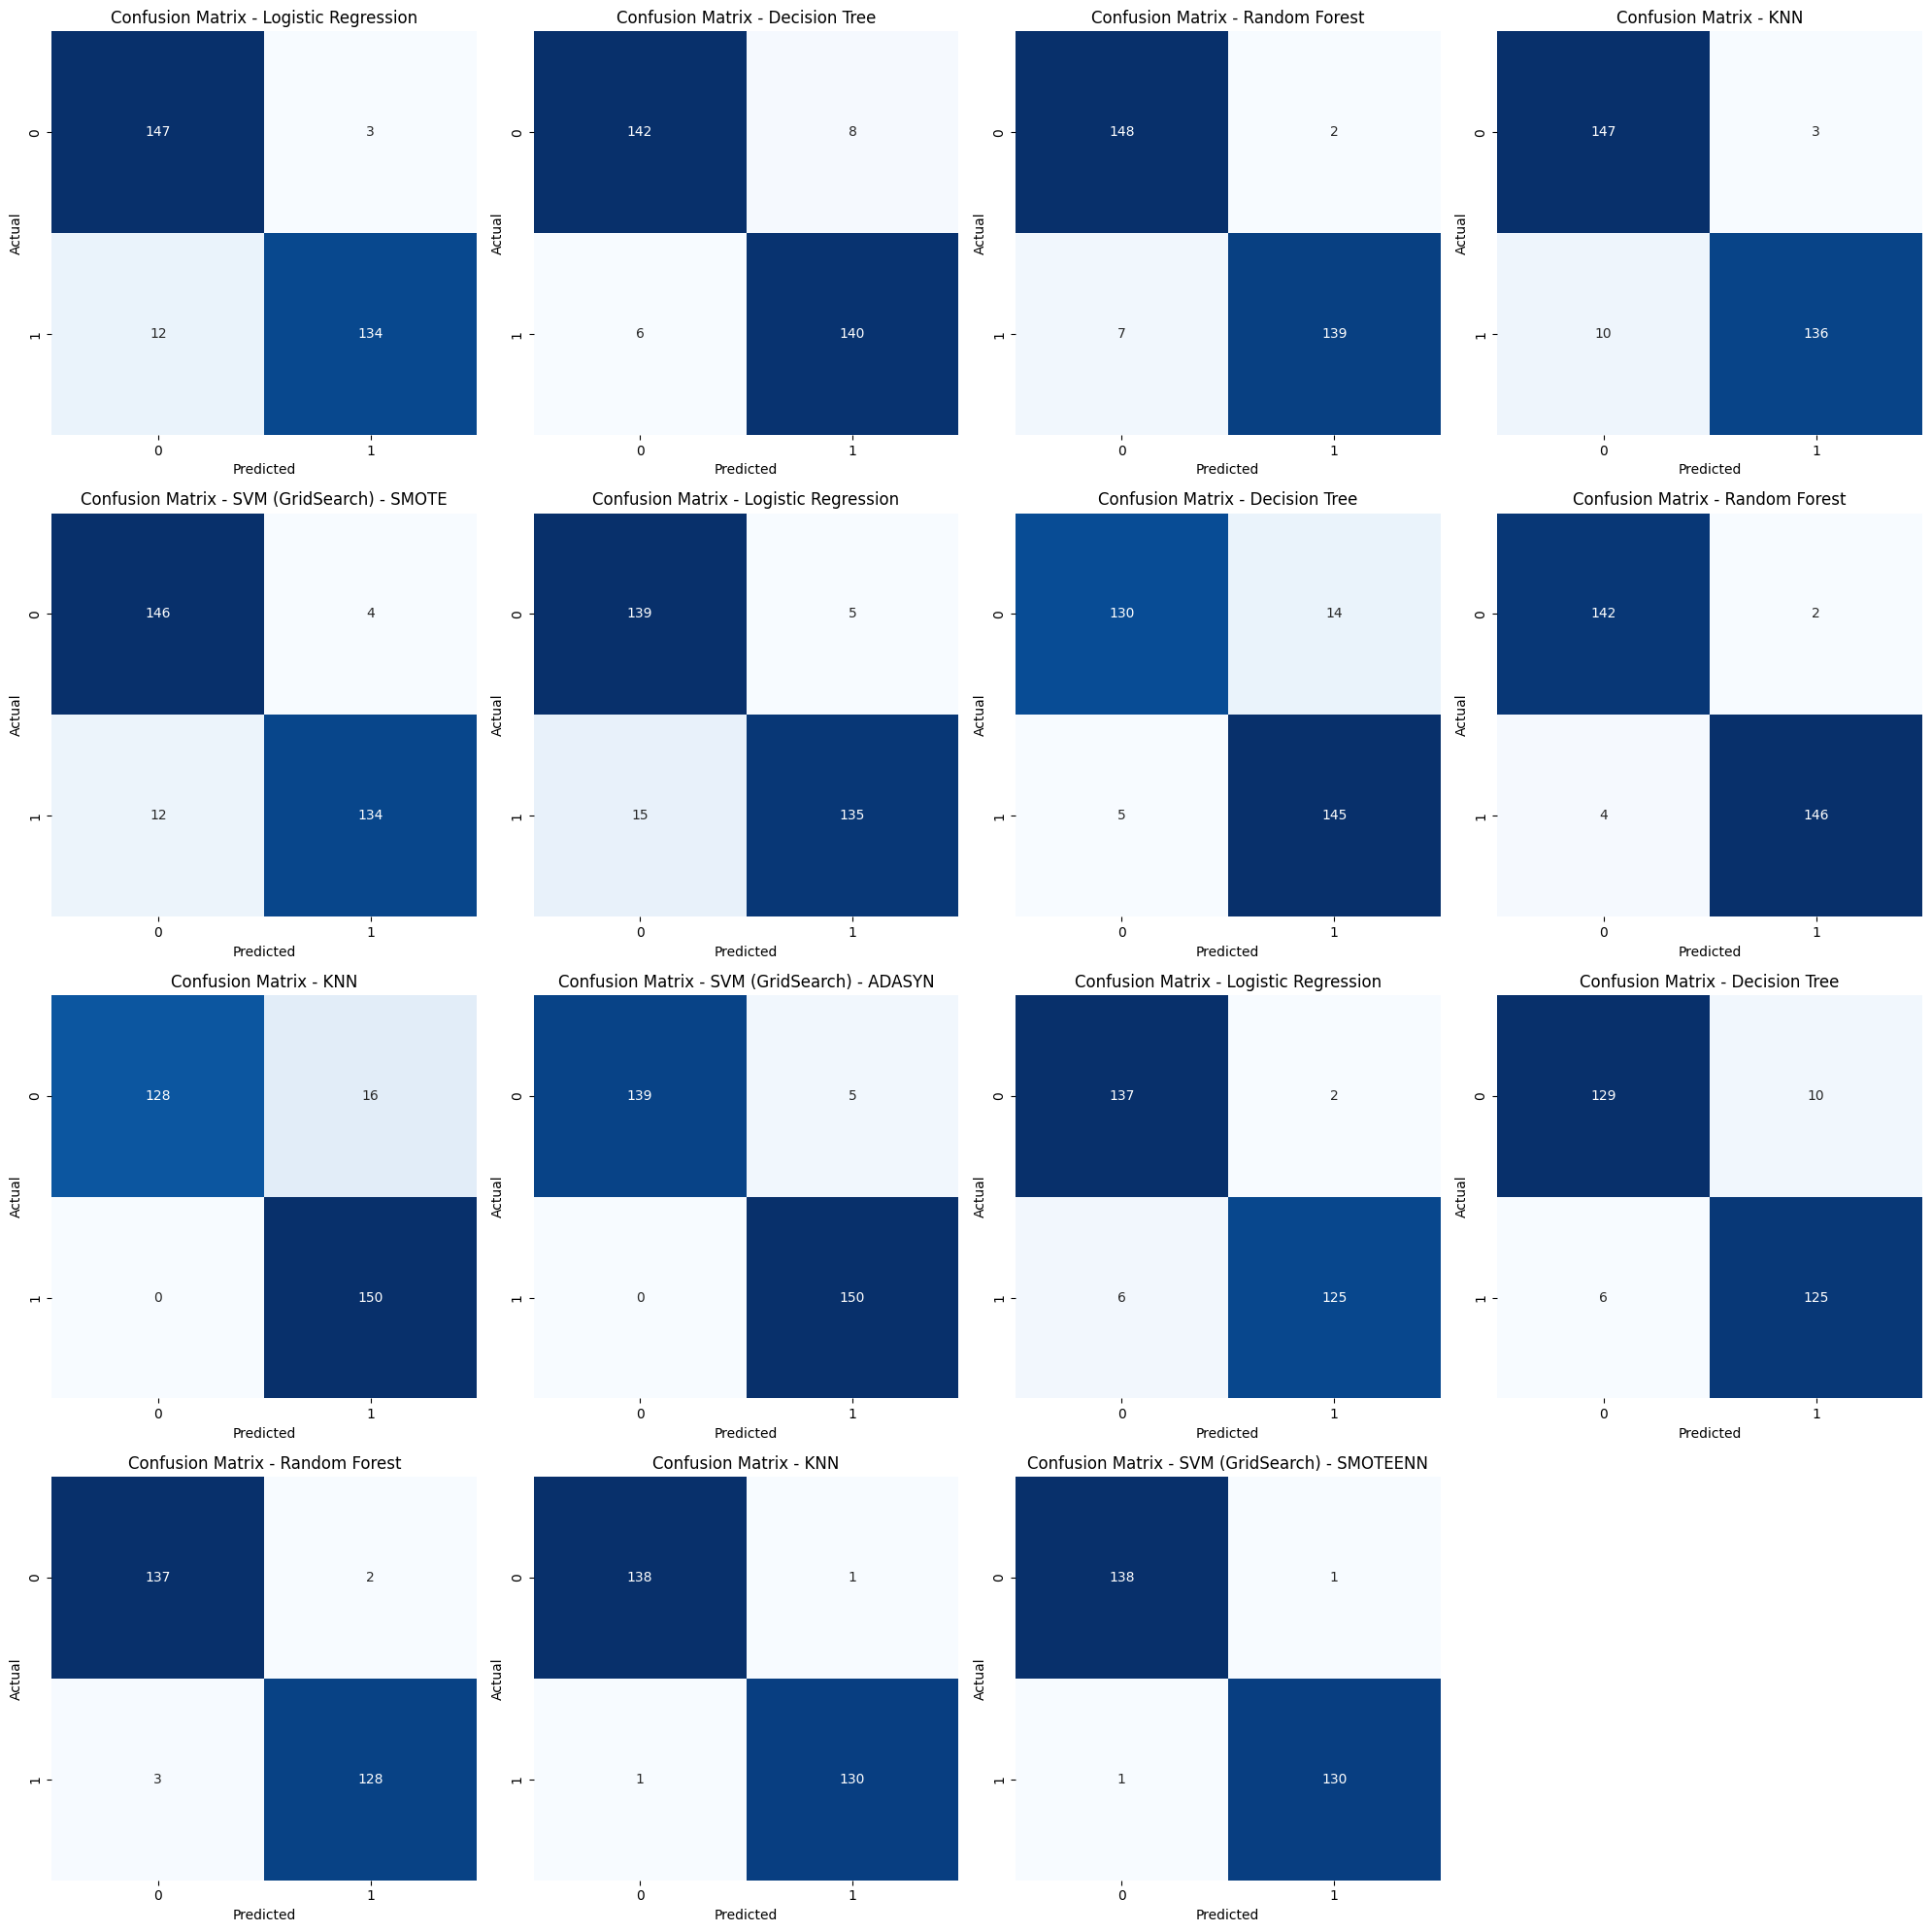

In [90]:

# Set up the figure and axes for subplots
num_rows = len(results_df) // 4 + (len(results_df) % 4 > 0)  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting confusion matrices
for i, row in enumerate(results_df.itertuples(), start=0):
    ax = axes[i]
    algorithm = row.Algorithm
    cm = np.array(row._5)  # Adjust this index based on your actual DataFrame

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {algorithm}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the analysis, the best classification model is Random Forest with SMOTEENN resampling method.

In [52]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))



confusion matrix: 
[[42  0]
 [ 1 56]]
precision:  1.0
recall:  0.9824561403508771
f1-score:  0.9911504424778761


Identifying whether the input credit card Transaction sample is Fraudulent or Non-Fraudulent.

In [53]:
sample_input = {
    'Time': 12345,
    'V1': -0.5,
    'V2': 0.8,
    'V3': -1.2,
    'V4': 1.5,
    'V5': -0.7,
    'V6': -0.3,
    'V7': 0.2,
    'V8': 0.1,
    'V9': -0.5,
    'V10': 0.6,
    'V11': -0.2,
    'V12': -0.4,
    'V13': 0.3,
    'V14': 0.2,
    'V15': -0.1,
    'V16': 0.4,
    'V17': -0.3,
    'V18': 0.5,
    'V19': -0.2,
    'V20': 0.3,
    'V21': 0.1,
    'V22': 0.2,
    'V23': -0.1,
    'V24': 0.4,
    'V25': -0.2,
    'V26': 0.3,
    'V27': 0.1,
    'V28': 0.2,
    'Amount': 100.0  # Adjust the amount based on your scenario
}

# Convert sample_input to DataFrame
sample_input_df = pd.DataFrame(sample_input, index=[0])

In [54]:
predicted_class = rf_model.predict(sample_input_df)

In [76]:
if predicted_class == 0:
  print('Credit Card Transaction Sample: Non-Fraudulent (Class 0)')
else:
  print('Credit Card Transaction Sample: Fraudulent (Class 1)')

Credit Card Transaction Sample: Non-Fraudulent (Class 0)


In [71]:
sample_input_df1 = {
    'Time': 2000,
    'V1': -3.0,
    'V2': 2.5,
    'V3': -4.0,
    'V4': 4.0,
    'V5': -2.0,
    'V6': -1.5,
    'V7': 1.5,
    'V8': -0.8,
    'V9': -1.2,
    'V10': 4.5,
    'V11': -2.0,
    'V12': -3.0,
    'V13': 2.0,
    'V14': -1.0,
    'V15': 0.5,
    'V16': 2.5,
    'V17': -1.0,
    'V18': 1.2,
    'V19': -0.5,
    'V20': 1.0,
    'V21': 0.5,
    'V22': 0.8,
    'V23': -0.3,
    'V24': 1.0,
    'V25': -0.4,
    'V26': 0.8,
    'V27': 0.3,
    'V28': 0.5,
    'Amount': 1000.0
}

sample_input_df1 = pd.DataFrame(sample_input_df1, index=[0])
predicted_class1 = rf_model.predict(sample_input_df1)


In [75]:
if predicted_class1 == 0:
  print('Credit Card Transaction Sample: Non-Fraudulent (Class 0)')
else:
  print('Credit Card Transaction Sample: Fraudulent (Class 1)')

Credit Card Transaction Sample: Fraudulent (Class 1)
